In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.optimize import curve_fit
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html

In [3]:
data = pd.read_csv("cleanData.csv",index_col=0)

In [5]:
series = data.columns

Index(['Date', 'AAPL', 'AMZN', 'FSPTX', 'SHRAX', 'SPY'], dtype='object')

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.04907D-01    |proj g|=  4.11173D-01

At iterate    5    f= -1.63093D+00    |proj g|=  7.19279D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     10      1     0     0   8.668D-07  -1.631D+00
  F =  -1.6309630792393393     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.03268D+00    |proj g|=  3.68432D-01

At iterate    5    f= -2.81740D+00    |proj g|=  2.59750D-04

At iterate   10    f= -2.81875D+00    |proj g|=  9.64752D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     18      1     0     0   4.393D-06  -2.819D+00
  F =  -2.8187525029497467     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate   10    f= -2.77130D+00    |proj g|=  3.20481D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     12      1     0     0   3.205D-06  -2.771D+00
  F =  -2.7713013400188182     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


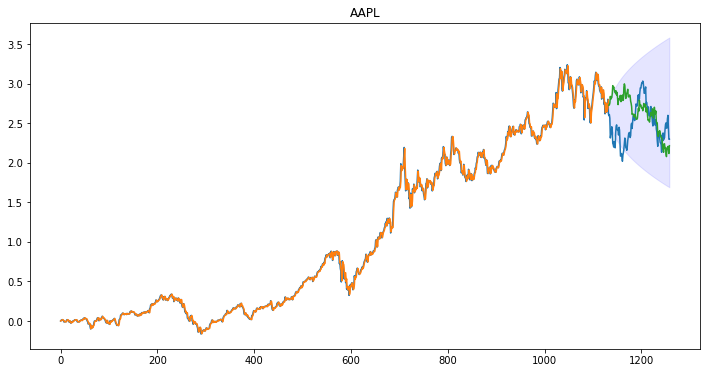

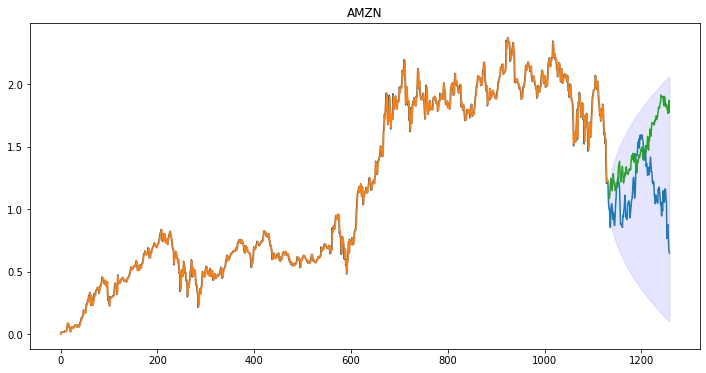

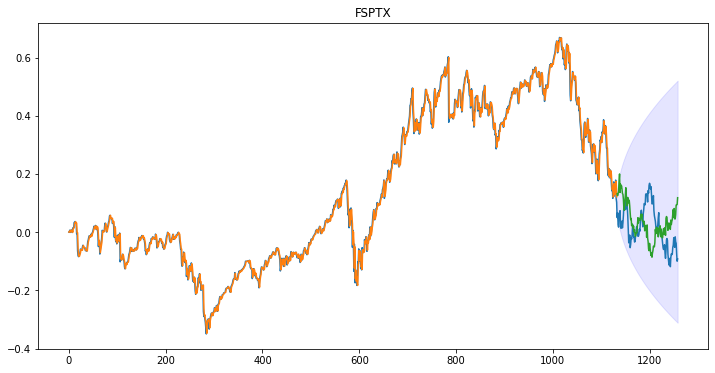

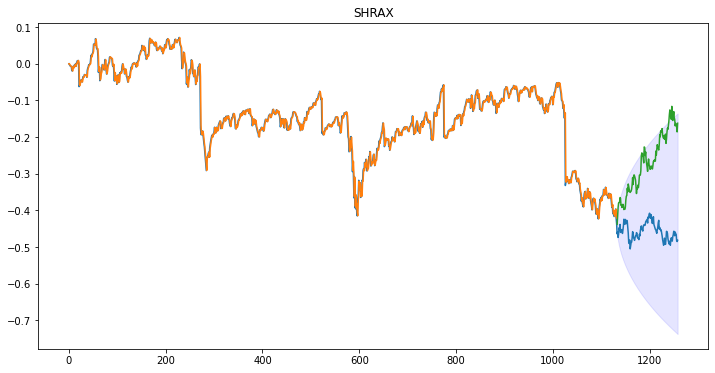

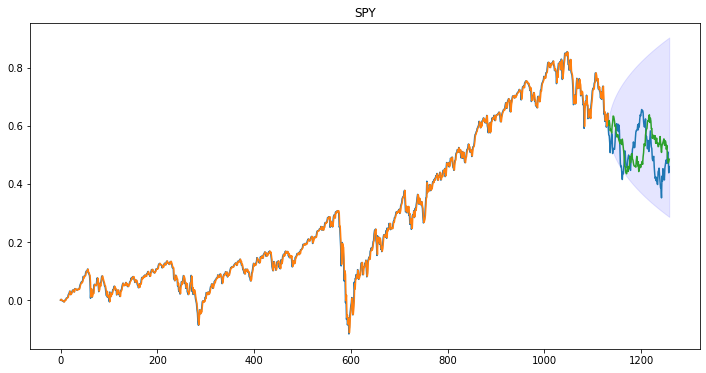

In [36]:
for i in range(1,len(series)):
    
    thisSeries = data[series[i]]
    t = np.arange(0,len(thisSeries),1)

    trainX = t[:int(.9*len(thisSeries))]
    testX = t[int(.9*len(thisSeries)):]

    trainY = thisSeries[:int(.9*len(thisSeries))]
    testY = thisSeries[int(.9*len(thisSeries)):]

    fit = ExponentialSmoothing(trainY).fit();

    simulation = fit.simulate(len(testX)) + fit.fittedvalues.iloc[-1] 
    forecast = fit.get_forecast(len(testX)).summary_frame()

    plt.figure(figsize = (12,6))

    plt.plot(t,thisSeries)
    plt.plot(trainX,fit.fittedvalues)
    plt.plot(testX,simulation)
    plt.fill_between(testX,(forecast['mean_ci_lower']), (forecast['mean_ci_upper']), color='b', alpha=.1)
    plt.title(series[i]);
